### Student Information
Name:廖利華

Student ID:11414613

GitHub ID:cx0701

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### **1.環境跟工具**

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\廖雨潔\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for 自動重新載入外部程式碼
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

C:\gitHub\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


### **2.載入資料**
發現幾個欄位必較特別:  
**polarity** 欄位 是紀錄文本的情感極性（sentiment polarity）:1 ~ -1  
**Sentiment** 欄位 是情感分類 (1.0 表示正面，0.0 表示中性，-1.0 表示負面 )  
**subjectivity** 欄位是紀錄主觀或客觀  

In [5]:
#CSV 檔案路徑
file_path = "C:/gitHub/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv"
ori_df = pd.read_csv(file_path, encoding='latin1') 

#print(df.head())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB
None


### **3.轉換為 Dataframe**

說明 : 和範例一樣把text 欄位變成 DataFrame

In [6]:
import pandas as pd
import helpers.data_mining_helpers as dmh
#避免動到原本資料
df = ori_df.copy()
#把文字存成list
text_list = df['text'].tolist()
X = pd.DataFrame(text_list, columns=['text'])

print(X[0:5])
len(X)

                                                text
0                                   Calls on retards
1  Stunt as in like why did they even make a big ...
2                  Seeing lots of red in the ticker.
3  Vision Marine Technologies Inc. is rewriting t...
4                         He didnât say thank you.


847

說明: 查看subreddit 欄位是否可以跟範例一樣當作 類別

In [7]:
categories = df['subreddit'].unique()
print(categories)

['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


In [21]:
category_index = {name: i for i, name in enumerate(categories)}
X['category'] = df['subreddit'].map(category_index)
X['category_name'] = df['subreddit']
X.head()

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment
0,Calls on retards,0,wallstreetbets,0,0.0,1.00,-0.90,-1
1,Stunt as in like why did they even make a big ...,0,wallstreetbets,-15,0.0,0.18,0.08,1
2,Seeing lots of red in the ticker.,1,StockMarket,1,0.0,0.00,0.00,0
3,Vision Marine Technologies Inc. is rewriting t...,2,stockstobuytoday,30,0.0,0.65,0.22,1
4,He didnât say thank you.,1,StockMarket,1,0.0,0.00,0.00,0


說明:    
    1.把 **upvotes** 欄位的按讚數量float 轉 int  
    2.把 **subjectivity** 和 **polarity** 四捨五入

In [122]:
X['title'] = df['title']
X['upvotes'] = df['upvotes'].astype(int)
X['downvotes'] = df['downvotes']
X['subjectivity'] = df['subjectivity'].round(2) #紀錄主觀或客觀
X['polarity'] = df['polarity'].round(2) #文本的情感極性
X['sentiment'] = df['sentiment'].astype(int) #正面/負面/中性
X.head()

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title
0,Calls on retards,0,wallstreetbets,0,NaN,1.00,-0.90,-1,Retardation is on the menu boys! WSB is so back
1,Stunt as in like why did they even make a big ...,0,wallstreetbets,-15,NaN,0.18,0.08,1,Retail giant TARGET has now declined for 10 co...
2,Seeing lots of red in the ticker.,1,StockMarket,1,NaN,0.00,0.00,0,How do you feel about a sitting president maki...
3,Vision Marine Technologies Inc. is rewriting t...,2,stockstobuytoday,30,0.0,0.65,0.22,1,Who knows more? $VMAR
4,He didnât say thank you.,1,StockMarket,1,NaN,0.00,0.00,0,The Trump administration is begging Xi Jinping...


### **4.處理缺失值**

In [31]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,783,0,0,0,0


說明:  
確認 X (data frame )總共有847筆資料  
並發現 **downvotes** 按倒讚的數量很多null，先給0

In [48]:
len(X) 

847

In [33]:
X['downvotes'] = X['downvotes'].fillna(0).astype(int)

說明:  
在第三階段轉換成data frame 的時候 **upvotes**  按讚數量有負值，資料集已有 **downvotes** 記錄倒讚數，因此 **upvotes**按讚數量為負的似乎不合理  
因此 在data_mining_helpers.py 新增檢查負值的函數 check_negative_values() 和 移除負值drop_negative_rows

In [34]:
dmh.check_negative_values(X)

category          0
upvotes          21
downvotes         0
subjectivity      0
polarity        197
sentiment       197
Name: Negative Count, dtype: int64

說明:  
利用X_clean 記錄新的list，避免後續有問題，要重新處理X

In [35]:
cols_to_check = ['upvotes']
X_clean = dmh.drop_negative_rows(X,cols_to_check)
dmh.check_negative_values(X_clean)
X_clean.head()

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title
0,Calls on retards,0,wallstreetbets,0,0,1.00,-0.90,-1,Retardation is on the menu boys! WSB is so back
2,Seeing lots of red in the ticker.,1,StockMarket,1,0,0.00,0.00,0,How do you feel about a sitting president maki...
3,Vision Marine Technologies Inc. is rewriting t...,2,stockstobuytoday,30,0,0.65,0.22,1,Who knows more? $VMAR
4,He didnât say thank you.,1,StockMarket,1,0,0.00,0.00,0,The Trump administration is begging Xi Jinping...
5,"Hoping to ejaculate in wet warm puss tonight, ...",0,wallstreetbets,16,0,0.50,0.25,1,Weekend Discussion Thread for the Weekend of A...


### **4.2處理重複資料**

說明:  
以text 去看重複值

In [46]:
duplicates = X_clean[X_clean.duplicated(subset=['text'], keep='first')]
duplicates

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title
42,So they went from saying redditors are bad for...,3,stocks,3943,0,0.67,-0.70,-1,"It's fucking awful seeing the ""Silver"" misinfo..."
349,Updated Daily by EOD\n\n \n[Daily Shorts](),2,stockstobuytoday,1,0,0.10,0.00,0,FINRA Daily Shorts Data
352,"how does the futures market look today\n\nSPY,...",2,stockstobuytoday,1,0,0.38,0.06,1,Futures Market
387,This data is from FINRA ATS - Updated Weekly\n...,2,stockstobuytoday,1,0,0.00,0.00,0,Dark Pool Data
432,"&#x200B;\n\n [Cryptocurrency Prices, Charts, D...",2,stockstobuytoday,1,0,0.00,0.00,0,Crypto Gainers - Coinbase
438,"Summarized with Highlights, updated weekly be ...",2,stockstobuytoday,1,0,0.00,0.00,0,Commitment of Trader Report
462,This data is from FINRA ATS - Updated Weekly\n...,2,stockstobuytoday,1,0,0.00,0.00,0,Dark Pool Data
473,"how does the futures market look today\n\nSPY,...",2,stockstobuytoday,1,0,0.38,0.06,1,Futures Market
520,Updated Daily by EOD\n\n \n[Daily Shorts](),2,stockstobuytoday,1,0,0.10,0.00,0,FINRA Daily Shorts Data
541,\n\n [Threshold (stockbuyvest.com)]() \n\n$AMC...,2,stockstobuytoday,1,0,0.00,0.00,0,Threshold Securities -aka Naked Shorts


說明:  
刪除重複值(保留第一筆)

In [47]:
X_clean = X_clean.drop_duplicates()
X_clean

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title
0,Calls on retards,0,wallstreetbets,0,0,1.00,-0.90,-1,Retardation is on the menu boys! WSB is so back
2,Seeing lots of red in the ticker.,1,StockMarket,1,0,0.00,0.00,0,How do you feel about a sitting president maki...
3,Vision Marine Technologies Inc. is rewriting t...,2,stockstobuytoday,30,0,0.65,0.22,1,Who knows more? $VMAR
4,He didnât say thank you.,1,StockMarket,1,0,0.00,0.00,0,The Trump administration is begging Xi Jinping...
5,"Hoping to ejaculate in wet warm puss tonight, ...",0,wallstreetbets,16,0,0.50,0.25,1,Weekend Discussion Thread for the Weekend of A...
...,...,...,...,...,...,...,...,...,...
841,So countries âbegging to stop the tariffsâ...,1,StockMarket,1,0,0.00,0.00,0,The Trump administration is begging Xi Jinping...
842,Invest now it is going to shoot up tomorrow,2,stockstobuytoday,1,0,0.00,0.00,0,$MRIN Marin Software killed it today. Hope som...
843,Where can I read this?,1,StockMarket,2,0,0.00,0.00,0,$ U.S. dollar value (crashing)
845,i sold my puts so i expect cheeto to declare w...,0,wallstreetbets,10,0,0.00,0.00,0,Weekend Discussion Thread for the Weekend of A...


In [49]:
len(X_clean)

805

說明:  
利用 **Series** 計算新的new_upvote_ratio  
new_upvote_ratio = upvotes / 總票數

In [121]:
import numpy as np
all_votes = X_clean['upvotes'] + X_clean['downvotes']

X_clean['new_upvote_ratio'] = np.where(
    all_votes > 0,
    (X_clean['upvotes'] / all_votes).round(5), 0  
)

X_clean.head()

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title,unigrams,new_upvote_ratio
0,Calls on retards,0,wallstreetbets,0,0,1.00,-0.90,-1,Retardation is on the menu boys! WSB is so back,"[Calls, on, retards]",0.0
2,Seeing lots of red in the ticker.,1,StockMarket,1,0,0.00,0.00,0,How do you feel about a sitting president maki...,"[Seeing, lots, of, red, in, the, ticker, .]",1.0
3,Vision Marine Technologies Inc. is rewriting t...,2,stockstobuytoday,30,0,0.65,0.22,1,Who knows more? $VMAR,"[Vision, Marine, Technologies, Inc., is, rewri...",1.0
4,He didnât say thank you.,1,StockMarket,1,0,0.00,0.00,0,The Trump administration is begging Xi Jinping...,"[He, didnât, say, thank, you, .]",1.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",0,wallstreetbets,16,0,0.50,0.25,1,Weekend Discussion Thread for the Weekend of A...,"[Hoping, to, ejaculate, in, wet, warm, puss, t...",1.0


### **5.採樣**

採清理後總資料數量的 20% 為樣本

In [50]:
X_sample = X_clean.sample(n=160) 
X_sample[0:4]

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title
193,This is what all of the âlunatic leftâ has...,3,stocks,38,0,0.35,0.32,1,U.S. 10-year Treasury yields rise as Trump tar...
618,i think people should look more closely at his...,1,StockMarket,2,0,0.52,0.32,1,"Trump is surrounded by a bunch of idiots, he s..."
826,That's how you get black market lol \n\nChina ...,3,stocks,1,0,0.57,0.37,1,BREAKING: China raises tariffs on U.S. goods t...
251,What market manipulation will he do today?,1,StockMarket,1,0,0.00,0.00,0,Trump: We Are Doing Really Well On Our Tariff ...


### **5.1繪製採樣圖表**
1.圖一: 顯示採樣後每個類別的數量  
2.圖二: 顯示採樣前 和 已清理的資料數量  

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

圖一

category_name
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

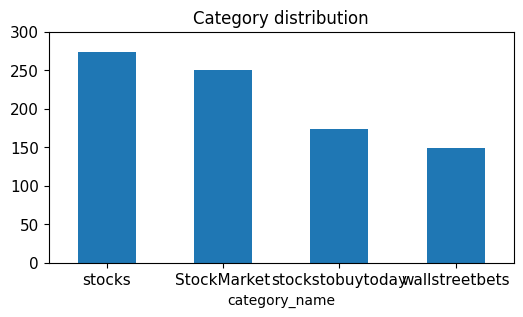

In [54]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (6,3))

圖二

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

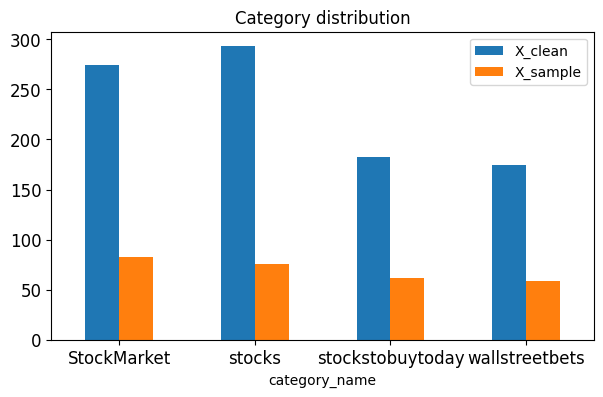

In [56]:
counts_X = X_clean['category_name'].value_counts()+30
counts_sample = X_sample['category_name'].value_counts()+30

combine_X = pd.DataFrame({
    'X_clean': counts_X,
    'X_sample': counts_sample
})

combine_X.plot(kind='bar', 
               figsize=(7,4),
               rot=0, 
               fontsize=12, 
               title='Category distribution')

### **5.2特徵創建**

In [57]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\廖雨潔\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\廖雨潔\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [68]:
X_clean['unigrams'] = X_clean['text'].apply(lambda x: dmh.tokenize_text(x))

In [69]:
X_clean[0:4]["unigrams"]

0                                 [Calls, on, retards]
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                   [He, didnât, say, thank, you, .]
Name: unigrams, dtype: object

In [70]:
X_clean[0:4]

,text,category,category_name,upvotes,downvotes,subjectivity,polarity,sentiment,title,unigrams
0,Calls on retards,0,wallstreetbets,0,0,1.00,-0.90,-1,Retardation is on the menu boys! WSB is so back,"[Calls, on, retards]"
2,Seeing lots of red in the ticker.,1,StockMarket,1,0,0.00,0.00,0,How do you feel about a sitting president maki...,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,2,stockstobuytoday,30,0,0.65,0.22,1,Who knows more? $VMAR,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didnât say thank you.,1,StockMarket,1,0,0.00,0.00,0,The Trump administration is begging Xi Jinping...,"[He, didnât, say, thank, you, .]"


### **5.3 特徵子集選擇**

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_clean.text) 
print(X_counts)

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2707))	1
  (np.int32(0), np.int32(3248))	1
  (np.int32(1), np.int32(3386))	1
  (np.int32(1), np.int32(2375))	1
  (np.int32(1), np.int32(2688))	1
  (np.int32(1), np.int32(3150))	1
  (np.int32(1), np.int32(2027))	1
  (np.int32(1), np.int32(3846))	1
  (np.int32(1), np.int32(3888))	1
  (np.int32(2), np.int32(2707))	2
  (np.int32(2), np.int32(2688))	4
  (np.int32(2), np.int32(2027))	1
  (np.int32(2), np.int32(3846))	8
  (np.int32(2), np.int32(4146))	3
  (np.int32(2), np.int32(2427))	3
  (np.int32(2), np.int32(3820))	3
  (np.int32(2), np.int32(2029))	3
  (np.int32(2), np.int32(2151))	3
  (np.int32(2), np.int32(3262))	1
  (np.int32(2), np.int32(4193))	2
  (np.int32(2), np.int32(3312))	1
  (np.int32(2), np.int32(3847))	2
  (np.int32(2), np.int32(857))	2
  (np.int32(2), np.int32(4277))	3
  :	:
  (np.int32(801), np.int32(1744))	1
  (np.int32(801), np.int32(2667))	1
  (np.int32(801), np.int32(4072))	1
  (np.int32(801), np.int32(2126))	1
  

In [67]:
count_vect.get_feature_names_out()[692]

'calls'

In [74]:
#創建自己的分析器
analyze = count_vect.build_analyzer()

In [75]:
#測試
analyze(X_clean.text[0])

['calls', 'on', 'retards']

In [76]:
#建立 文件詞彙矩陣（document-term matrix）
X_counts.shape

(805, 4358)

In [77]:
#測試
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [97]:
#查看稀疏矩陣
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### 繪製熱圖 - 稀疏矩陣視覺化

In [94]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]
plot_z = X_counts[0:30, 0:30].toarray()

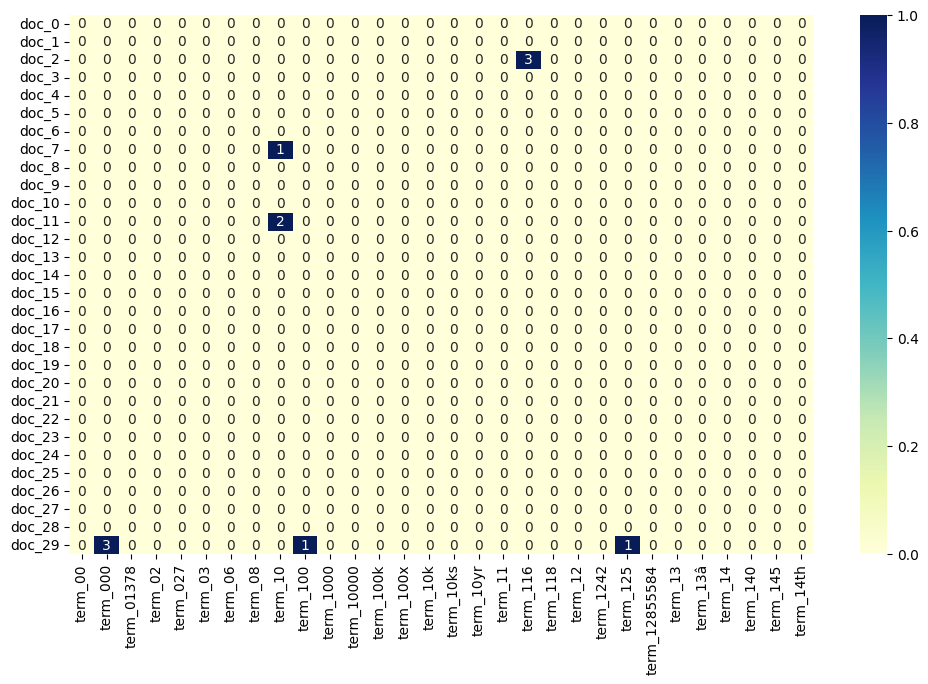

In [96]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 7))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True)

### 矩陣圖 - 繪畫出不同類別的前幾筆的upvotes按讚數 (取 log 的 upvotes 分布)

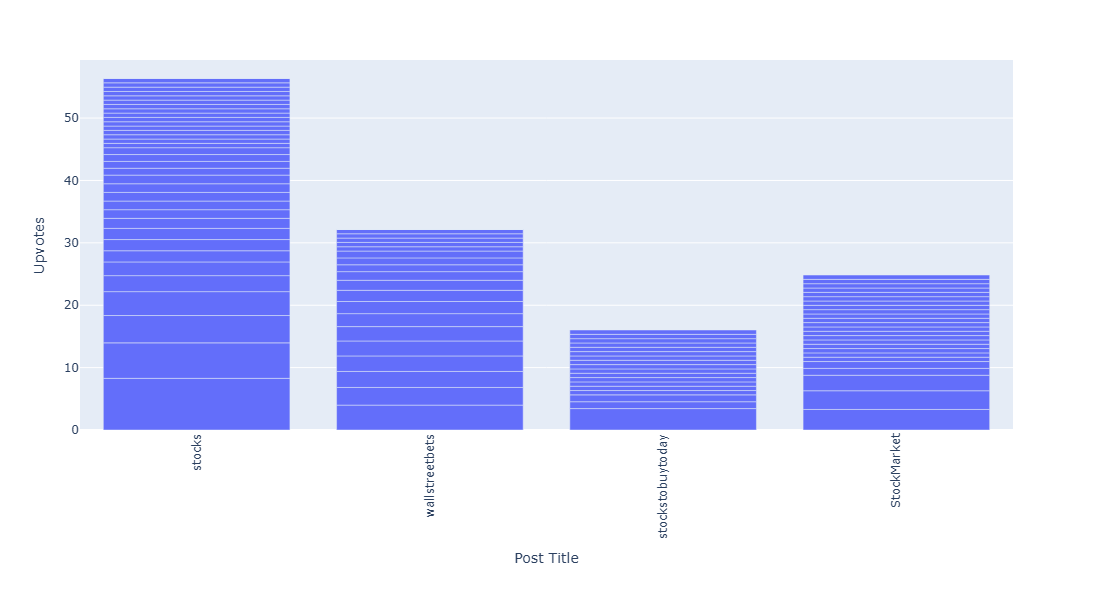

In [113]:
import plotly.express as px
import math

df_plot = X_clean[['category_name', 'upvotes']].head(100)
df_plot['upvotes'] = df_plot['upvotes'].apply(lambda x: math.log(x+1))

df_sorted = df_plot.sort_values(by='upvotes', ascending=False)

# 畫圖
fig = px.bar(df_sorted,
             x='category_name',
             y='upvotes',
             labels={'title': 'Post Title', 'upvotes': 'Upvotes'},
             height=600)

fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_title="Post Title",
    yaxis_title="Upvotes",
    showlegend=False,
    margin=dict(b=170) 
)



### 散佈圖 - 透過sentiment 情緒欄位和index 畫出分布
sentiment = 1 代表正面  
sentiment = 0 代表中性  
sentiment = -1  代表負面  
點的大小由 polarity 欄位(文本的情感極性-> 情緒強度）決定，值越大點越大  
四種類別的資料對應不同顏色

In [136]:
print(categories)

['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


Text(0.5, 1.0, 'Sentiment vs Index (size by Polarity, custom color)')

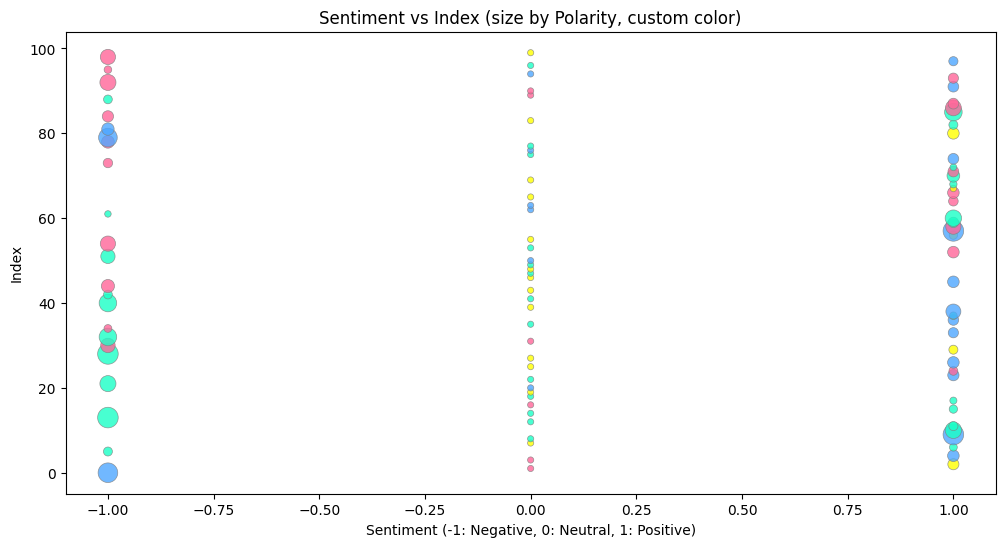

In [132]:
import matplotlib.pyplot as plt
df_plot = X_clean[['category', 'polarity', 'sentiment', 'upvotes']].head(100)

# 將 category 轉成 Categorical
df_plot['category'] = pd.Categorical(df_plot['category'])

# 自訂顏色
custom_colors = {0: '#4da6ff', 1: '#ff6699', 2: 'yellow',3: '#1affc6'}
color_codes = df_plot['category'].cat.codes.map(lambda x: custom_colors.get(x % 4)) 

# 點大小，用 polarity 的絕對值 + 0.1 放大
size = (df_plot['polarity'].abs() + 0.1) * 200

# y 軸索引
y = np.arange(len(df_plot))

plt.figure(figsize=(12,6))
plt.scatter(df_plot['sentiment'], y,
            s=size,
            c=color_codes,
            alpha=0.8,
            edgecolors='grey',
            linewidth=0.5)

plt.xlabel('Sentiment (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Index')
plt.title('Sentiment vs Index (size by Polarity, custom color)')


### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

# Phase 2

In [ ]:
### Begin Assignment Here